# Dataset 1

## Data

### Generating dataset

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.metrics import  f1_score , confusion_matrix , accuracy_score
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve


In [99]:
# Generate the dataset with adjusted parameters
X, y = make_classification( n_samples=1000,
                            n_features=3,
                            n_classes=4,
                            n_clusters_per_class=1,
                            class_sep=2,
                            n_redundant=0 ,
                            random_state=24 )

# Convert dataset to DataFrame
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
df['Target'] = y

# Display a few records from the dataset
print(df)
print(X.shape, y.shape)


     Feature1  Feature2  Feature3  Target
0    2.628417 -2.698842 -0.387281       1
1    1.816352 -1.673546 -0.282533       1
2   -3.102045  0.877601 -0.847032       2
3    2.714914 -2.655495 -0.643499       1
4    1.894970 -1.957617  0.653826       1
..        ...       ...       ...     ...
995 -4.313079 -0.361263 -1.070625       2
996  2.835863 -2.667208  1.753649       1
997  0.175843  2.292155  1.846968       3
998  2.914391 -2.934094  0.462912       1
999  2.766699  1.702590 -0.798421       3

[1000 rows x 4 columns]
(1000, 3) (1000,)


### plotting the dataset

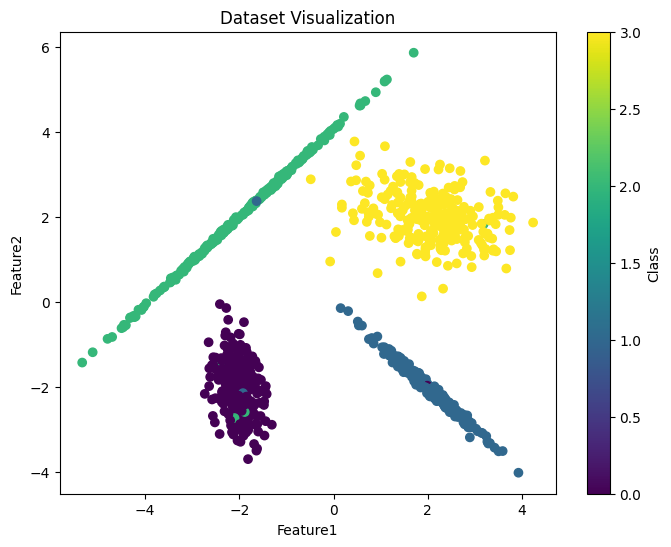

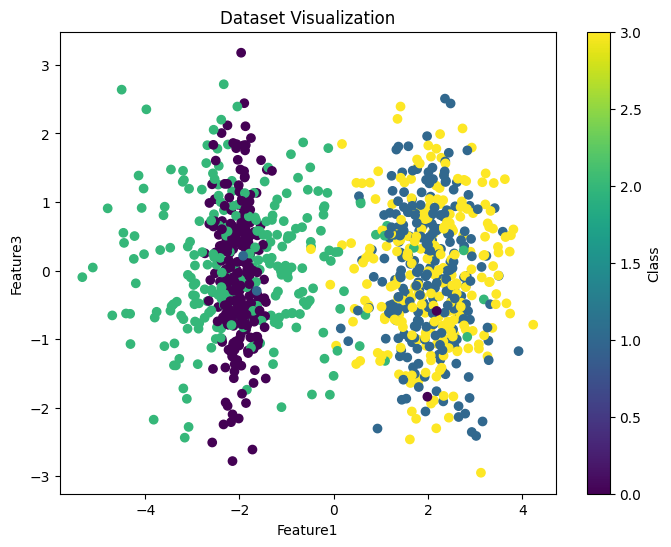

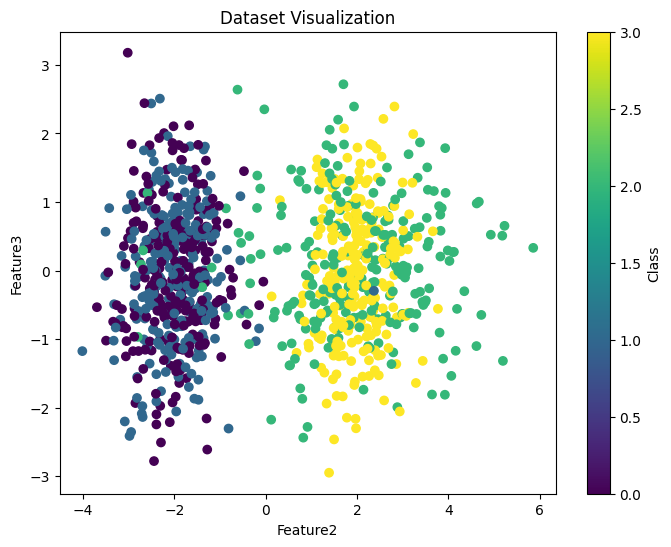

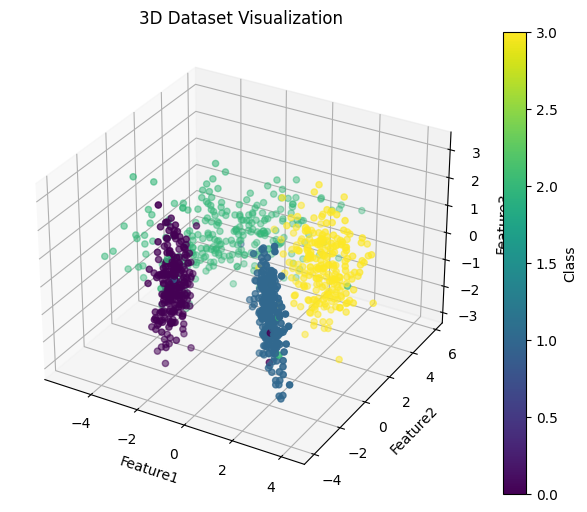

In [13]:

#plt.scatter(X[:,0],X[:,1],X[:,2], c=y)

# Plot the dataset with different colors for different classes
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Dataset Visualization')
plt.colorbar(label='Class')
plt.show()

# Plot the dataset with different colors for different classes
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 2], c=y, cmap='viridis')
plt.xlabel('Feature1')
plt.ylabel('Feature3')
plt.title('Dataset Visualization')
plt.colorbar(label='Class')
plt.show()

# Plot the dataset with different colors for different classes
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='viridis')
plt.xlabel('Feature2')
plt.ylabel('Feature3')
plt.title('Dataset Visualization')
plt.colorbar(label='Class')
plt.show()


# Create a 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
ax.set_title('3D Dataset Visualization')
plt.colorbar(scatter, label='Class')
plt.show()

### train test split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=24)

x_train.shape, y_train.shape, x_test.shape, y_test.shape ,

((800, 3), (800,), (200, 3), (200,))

## Logistic Regression

### model

In [26]:
model1 = LogisticRegression(solver='sag', max_iter=200, random_state=24)
model1.fit(x_train, y_train)
y_hat = model1.predict(x_test)
print(y_hat)
print(y_test)

[1 0 3 0 0 2 3 2 2 1 0 0 2 3 1 0 1 0 2 3 1 3 1 0 3 2 1 2 2 0 1 1 2 0 1 1 1
 3 1 1 3 1 0 0 2 3 0 3 0 0 0 0 2 3 2 3 0 2 0 3 2 3 0 0 0 3 3 3 0 3 1 0 0 2
 3 1 2 2 1 3 2 3 2 2 2 0 3 0 0 3 1 2 0 3 3 1 2 2 0 2 3 0 2 2 1 3 2 3 1 1 1
 0 1 1 1 1 3 3 2 1 0 3 1 1 3 0 2 3 1 0 1 3 0 3 2 0 0 2 0 3 1 0 2 0 1 2 3 1
 0 1 0 2 3 1 2 1 2 2 0 3 0 2 0 3 0 3 0 0 3 2 1 0 0 3 3 2 2 2 3 2 0 3 0 3 3
 2 2 1 3 3 1 3 0 2 2 1 1 3 3 2]
[1 0 3 0 0 2 3 2 2 1 0 0 2 3 1 0 1 0 2 3 1 3 1 0 3 2 1 2 2 0 1 1 2 0 1 1 1
 3 1 1 3 1 0 0 2 3 0 3 0 0 0 0 2 3 2 3 0 2 0 3 2 3 0 0 0 3 3 3 0 3 1 0 0 2
 2 1 2 2 1 3 2 3 2 2 2 0 3 0 0 3 1 2 0 3 3 1 2 2 0 2 3 0 2 2 1 3 2 3 1 1 1
 0 1 1 1 1 3 3 2 1 0 3 1 1 3 0 2 3 1 0 1 3 0 3 2 0 0 2 0 3 1 0 2 0 1 2 3 1
 0 1 0 2 3 1 2 0 2 2 0 3 0 2 0 3 0 3 0 0 3 2 1 0 0 3 3 2 3 2 3 2 0 3 0 3 3
 2 2 1 3 3 1 3 0 2 2 1 1 3 3 2]


### Results

In [27]:

train_score = model1.score(x_train, y_train)
test_score = model1.score(x_test, y_test)
acc = accuracy_score(y_test,y_hat)
con = confusion_matrix(y_test,y_hat)
print(acc)
print(con)
print ("train score is :" , train_score)
print ("test score is :" , test_score)

0.985
[[54  1  0  0]
 [ 0 43  0  0]
 [ 0  0 48  1]
 [ 0  0  1 52]]
train score is : 0.97125
test score is : 0.985


## decision boundary visualization

### 3D all

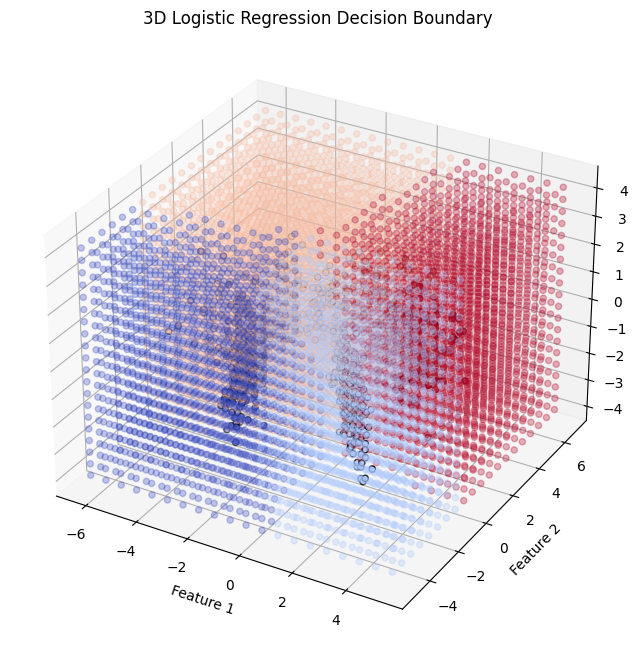

In [21]:
# Define meshgrid
h = 0.2  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 20),
                         np.linspace(y_min, y_max, 20),
                         np.linspace(z_min, z_max, 20))

# Predict class labels for each point in the meshgrid
mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z = model1.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot decision boundary (use contourf3D for a filled contour plot)
# Note: Adjusting for better visualization. This will plot points and not a continuous boundary
ax.scatter(mesh_points[:, 0], mesh_points[:, 1], mesh_points[:, 2], c=Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the training points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Logistic Regression Decision Boundary')

plt.show()

### 3D 1 vs all

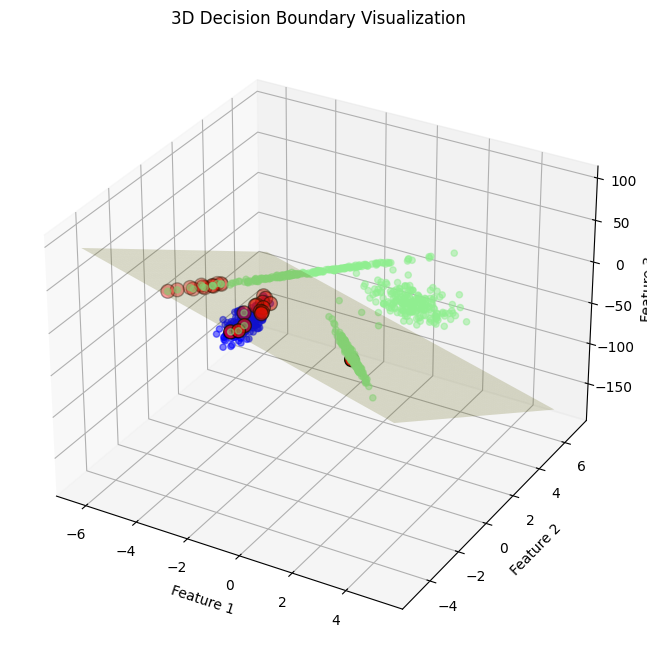

In [36]:

# Simplify to a binary classification problem for visualization purposes
class_of_interest = 0 # change for each class
y_binary = (y_train == class_of_interest).astype(int)  # Class of interest vs. all

# Train the logistic regression model on the binary class data
model2 = LogisticRegression(random_state=24)
model2.fit(x_train, y_binary)

# Predict on the training data to identify misclassified points
y_pred = model2.predict(x_train)
misclassified = y_pred != y_binary

# Creating a mesh grid
x = np.linspace(x_train[:, 0].min() - 1, x_train[:, 0].max() + 1, num=50)
y = np.linspace(x_train[:, 1].min() - 1, x_train[:, 1].max() + 1, num=50)
xx, yy = np.meshgrid(x, y)
zz = (-model2.intercept_ - model2.coef_[0][0] * xx - model2.coef_[0][1] * yy) / model2.coef_[0][2]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points for the class of interest
ax.scatter(x_train[y_binary == 1, 0], x_train[y_binary == 1, 1], x_train[y_binary == 1, 2], c='blue', alpha=0.5, label=f'Class {class_of_interest}')

# Plot points for "all" the other classes
ax.scatter(x_train[y_binary == 0, 0], x_train[y_binary == 0, 1], x_train[y_binary == 0, 2], c='lightgreen', alpha=0.5, label='Other Classes')

# Highlight misclassified points
ax.scatter(x_train[misclassified, 0], x_train[misclassified, 1], x_train[misclassified, 2], c='red', edgecolor='k', s=100, label='Misclassified')

# Plot the decision boundary
ax.plot_surface(xx, yy, zz, alpha=0.2, color='yellow', edgecolor='none', label='Decision Boundary')
plt.title('3D Decision Boundary Visualization')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()

### 2D dim reduced with 'PCA' for visualization

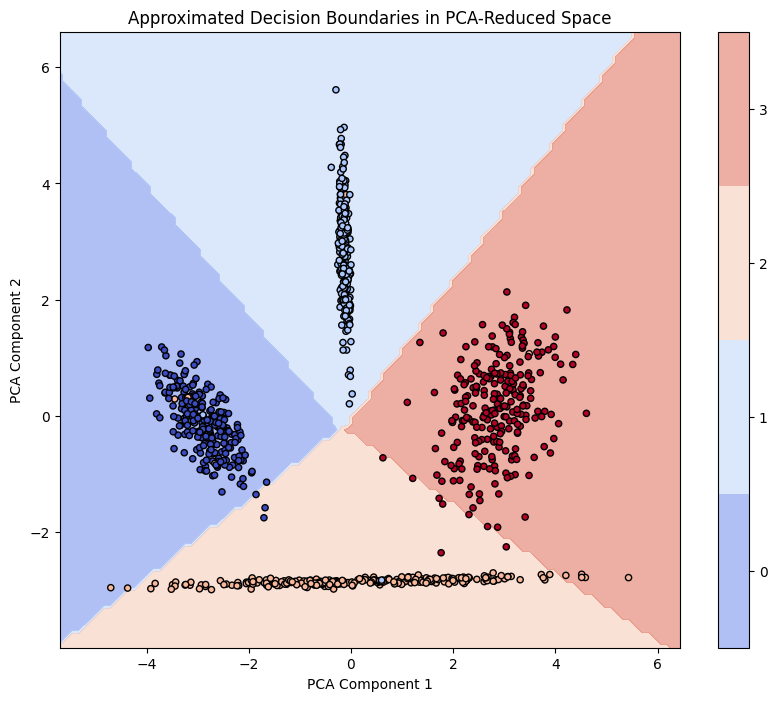

In [39]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality of the data for visualization
pca = PCA(n_components=2, random_state=24)
X_pca = pca.fit_transform(X)

# Create a dense grid in PCA-reduced space
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Inverse transform the grid to the original feature space
grid_pca = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_pca)

# Predict class probabilities for the grid points in the original feature space
Z = model1.predict_proba(grid_original)

# For each point in the grid, determine the predicted class by finding the class with the highest probability
Z_predicted_class = np.argmax(Z, axis=1)
Z_predicted_class = Z_predicted_class.reshape(xx.shape)

# Plot the decision boundaries and the PCA-reduced data points
plt.figure(figsize=(10, 8))
contour = plt.contourf(xx, yy, Z_predicted_class, alpha=0.5, cmap=plt.cm.coolwarm, levels=np.arange(len(np.unique(y))+1)-0.5)
plt.colorbar(contour, ticks=np.arange(len(np.unique(y))))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=20)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Approximated Decision Boundaries in PCA-Reduced Space')
plt.show()

### 2D with misclassified data highlighted

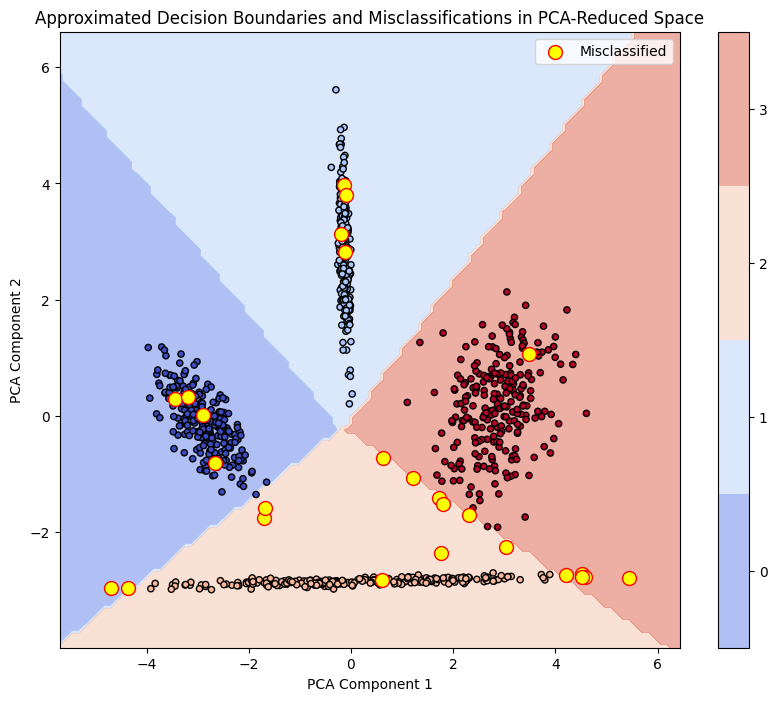

In [40]:
# Apply PCA to reduce the dimensionality of the data for visualization
pca = PCA(n_components=2, random_state=24)
X_pca = pca.fit_transform(X)

# Predict class labels for the original data
y_pred = model1.predict(X)

# Identify misclassified samples
misclassified = y != y_pred

# Create a dense grid in PCA-reduced space for decision boundary visualization
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Inverse transform the grid to the original feature space
grid_pca = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_pca)

# Predict class probabilities for the grid points in the original feature space
Z = model1.predict_proba(grid_original)

# Determine the predicted class for each point in the grid
Z_predicted_class = np.argmax(Z, axis=1)
Z_predicted_class = Z_predicted_class.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 8))

# Contour plot for decision boundaries
contour = plt.contourf(xx, yy, Z_predicted_class, alpha=0.5, cmap=plt.cm.coolwarm, levels=np.arange(len(np.unique(y)) + 1) - 0.5)
plt.colorbar(contour, ticks=np.arange(len(np.unique(y))))

# Scatter plot for correctly classified points
plt.scatter(X_pca[~misclassified, 0], X_pca[~misclassified, 1], c=y[~misclassified], cmap=plt.cm.coolwarm, edgecolor='k', s=20)

# Scatter plot for misclassified points
plt.scatter(X_pca[misclassified, 0], X_pca[misclassified, 1], c='yellow', edgecolor='red', linewidth=1, s=100, label='Misclassified')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Approximated Decision Boundaries and Misclassifications in PCA-Reduced Space')
plt.legend()
plt.show()

### 2D mlxtend

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


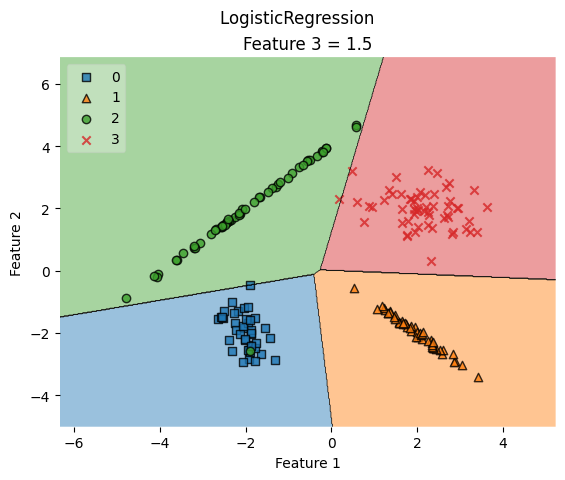

In [41]:
# Plotting decision regions
fig, ax = plt.subplots()
# Decision region for feature 3 = 1.5
value = 1.5
# Plot training sample with feature 3 = 1.5 +/- 0.75
width = 0.75
plot_decision_regions(X, y, clf=model1,
                      filler_feature_values={2: value},
                      filler_feature_ranges={2: width},
                      legend=2, ax=ax)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Feature 3 = {}'.format(value))

# Adding axes annotations
fig.suptitle('LogisticRegression ')
plt.show()

## SGDClassifier Perceptron

### model

In [97]:

model3 = SGDClassifier(loss="perceptron"
                          , eta0=0.001
                          , learning_rate="constant"
                          , penalty=None
                          , random_state=24
                          , max_iter=20
                          )
model3.fit(x_train , y_train)
y_hat = model3.predict(x_test)
print(y_hat)
print(y_test)


[1 0 3 0 2 2 3 2 2 1 0 0 2 3 1 0 1 0 2 3 1 3 1 0 3 2 1 2 2 0 1 1 2 0 1 1 1
 3 1 1 3 1 0 0 2 3 0 3 0 2 0 0 2 3 2 3 0 2 0 2 2 3 0 0 0 3 3 3 0 3 1 0 0 2
 3 1 2 2 1 3 2 3 2 2 2 0 3 0 0 3 1 2 0 3 3 1 2 2 0 2 3 0 2 2 1 3 2 3 1 1 1
 0 1 1 1 1 3 3 2 1 0 3 1 1 3 0 2 3 1 0 1 3 0 3 2 0 0 2 0 3 1 0 2 0 1 2 3 1
 0 1 0 2 3 1 2 1 2 2 0 3 0 2 0 3 0 3 0 0 3 2 1 0 0 3 3 2 2 2 3 2 0 3 0 3 3
 2 2 1 3 3 1 3 0 2 2 1 1 3 3 2]
[1 0 3 0 0 2 3 2 2 1 0 0 2 3 1 0 1 0 2 3 1 3 1 0 3 2 1 2 2 0 1 1 2 0 1 1 1
 3 1 1 3 1 0 0 2 3 0 3 0 0 0 0 2 3 2 3 0 2 0 3 2 3 0 0 0 3 3 3 0 3 1 0 0 2
 2 1 2 2 1 3 2 3 2 2 2 0 3 0 0 3 1 2 0 3 3 1 2 2 0 2 3 0 2 2 1 3 2 3 1 1 1
 0 1 1 1 1 3 3 2 1 0 3 1 1 3 0 2 3 1 0 1 3 0 3 2 0 0 2 0 3 1 0 2 0 1 2 3 1
 0 1 0 2 3 1 2 0 2 2 0 3 0 2 0 3 0 3 0 0 3 2 1 0 0 3 3 2 3 2 3 2 0 3 0 3 3
 2 2 1 3 3 1 3 0 2 2 1 1 3 3 2]


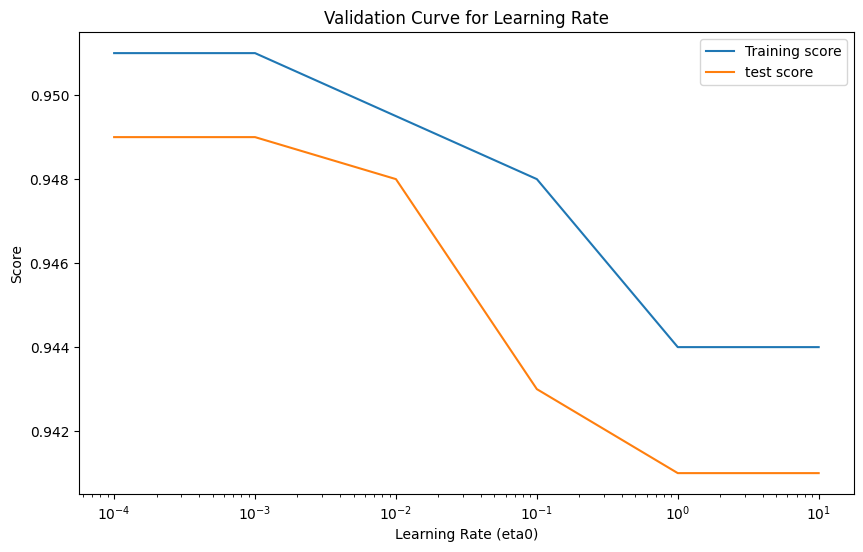

In [85]:
eta0_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

train_scores, test_scores = validation_curve(model3, X, y,
                                              param_name="eta0",
                                              param_range=eta0_values,
                                              scoring="accuracy"
                                              )

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(eta0_values, np.mean(train_scores, axis=1), label='Training score')
plt.plot(eta0_values, np.mean(test_scores, axis=1), label='test score')
plt.xscale('log')
plt.xlabel("Learning Rate (eta0)")
plt.ylabel("Score")
plt.title("Validation Curve for Learning Rate")
plt.legend()
plt.show()

### Results

In [86]:
train_score = model3.score(x_train, y_train)
test_score = model3.score(x_test, y_test)
acc = accuracy_score(y_test,y_hat)
con = confusion_matrix(y_test,y_hat)
print(acc )
print(con)
print ("train score is :" , train_score)
print ("test score is :" , test_score)

0.97
[[52  1  2  0]
 [ 0 43  0  0]
 [ 0  0 48  1]
 [ 0  0  2 51]]
train score is : 0.9375
test score is : 0.97


## decision boundary visualization

#### 3D  all

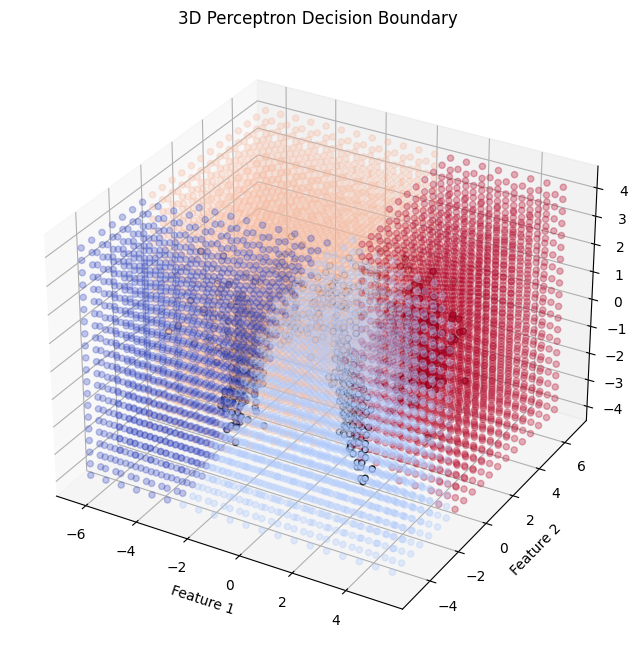

In [87]:
# Define meshgrid
h = 0.2  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 20),
                         np.linspace(y_min, y_max, 20),
                         np.linspace(z_min, z_max, 20))

# Predict class labels for each point in the meshgrid
mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z = model3.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot decision boundary (use contourf3D for a filled contour plot)
# Note: Adjusting for better visualization. This will plot points and not a continuous boundary
ax.scatter(mesh_points[:, 0], mesh_points[:, 1], mesh_points[:, 2], c=Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the training points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Perceptron Decision Boundary')

plt.show()

#### 3D 1 vs all

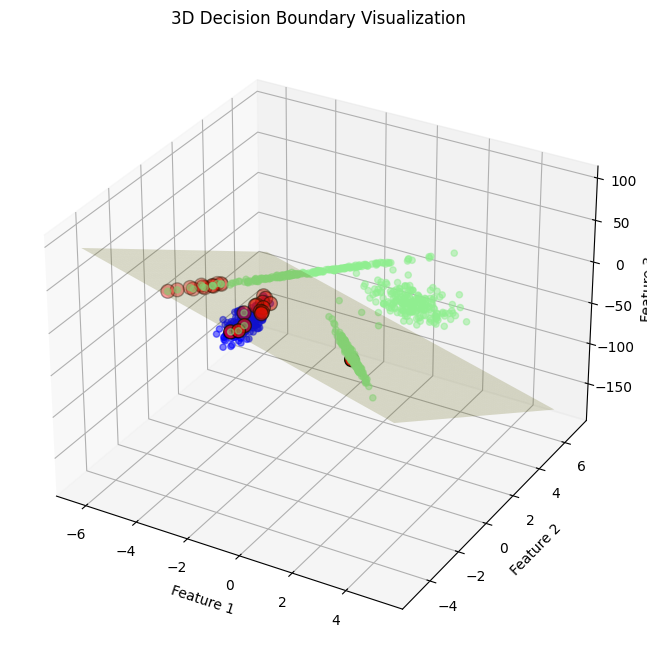

In [93]:
# Simplify to a binary classification problem for visualization purposes
class_of_interest = 0 # change for each class
y_binary = (y_train == class_of_interest).astype(int)  # Class of interest vs. all

# Train the logistic regression model on the binary class data
model2 = LogisticRegression(random_state=24)
model2.fit(x_train, y_binary)

# Predict on the training data to identify misclassified points
y_pred = model2.predict(x_train)
misclassified = y_pred != y_binary

# Creating a mesh grid
x = np.linspace(x_train[:, 0].min() - 1, x_train[:, 0].max() + 1, num=50)
y = np.linspace(x_train[:, 1].min() - 1, x_train[:, 1].max() + 1, num=50)
xx, yy = np.meshgrid(x, y)
zz = (-model2.intercept_ - model2.coef_[0][0] * xx - model2.coef_[0][1] * yy) / model2.coef_[0][2]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points for the class of interest
ax.scatter(x_train[y_binary == 1, 0], x_train[y_binary == 1, 1], x_train[y_binary == 1, 2], c='blue', alpha=0.5, label=f'Class {class_of_interest}')

# Plot points for "all" the other classes
ax.scatter(x_train[y_binary == 0, 0], x_train[y_binary == 0, 1], x_train[y_binary == 0, 2], c='lightgreen', alpha=0.5, label='Other Classes')

# Highlight misclassified points
ax.scatter(x_train[misclassified, 0], x_train[misclassified, 1], x_train[misclassified, 2], c='red', edgecolor='k', s=100, label='Misclassified')

# Plot the decision boundary
ax.plot_surface(xx, yy, zz, alpha=0.2, color='yellow', edgecolor='none', label='Decision Boundary')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Decision Boundary Visualization')
plt.show()

### 2D dim reduced with 'PCA' for visualization

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


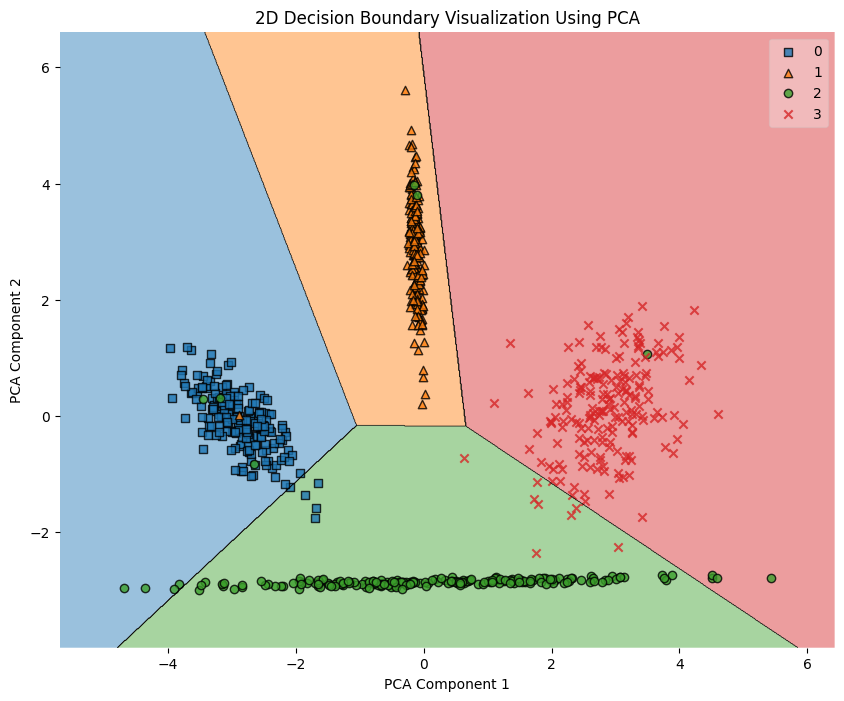

In [100]:
from mlxtend.plotting import plot_decision_regions

# Apply PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2, random_state=24)
X_pca = pca.fit_transform(X)

# Split the PCA-reduced dataset
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=24)

# Train a new SGDClassifier on the PCA-reduced training data
model_pca = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None, random_state=24, max_iter=200)
model_pca.fit(x_train_pca, y_train_pca)

# Plotting the decision boundary
plt.figure(figsize=(10, 8))
plot_decision_regions(x_train_pca, y_train_pca, clf=model_pca)
plt.title('2D Decision Boundary Visualization Using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### 2D with misclassified data highlighted

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


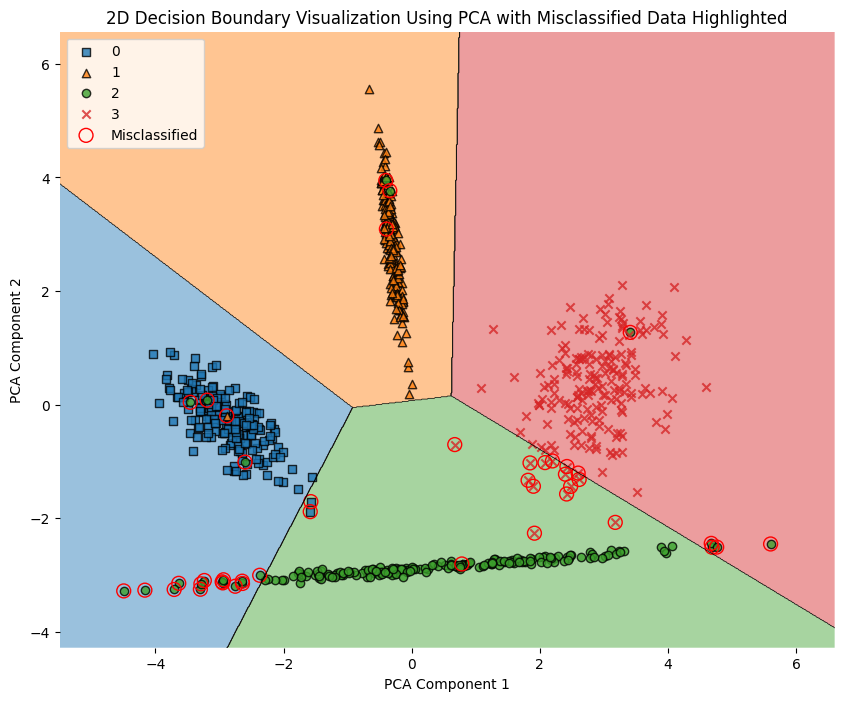

In [96]:
from mlxtend.plotting import plot_decision_regions

# Apply PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2, random_state=24)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train SGDClassifier on the PCA-reduced training data
model_pca = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None, random_state=24, max_iter=200)
model_pca.fit(x_train_pca, y_train)

# Predict on the PCA-reduced training data
y_train_pred = model_pca.predict(x_train_pca)

# Identify misclassified points
misclassified = y_train != y_train_pred

# Plotting the decision boundary and highlighting misclassified data
plt.figure(figsize=(10, 8))
plot_decision_regions(x_train_pca, y_train, clf=model_pca)

# Highlight misclassified points
plt.scatter(x_train_pca[misclassified, 0], x_train_pca[misclassified, 1],
            facecolors='none', edgecolors='r', s=100, label='Misclassified')

plt.title('2D Decision Boundary Visualization Using PCA with Misclassified Data Highlighted')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='upper left')
plt.show()

### 2D mlxtend

/home/amir/anaconda3/envs/Machine_learning/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


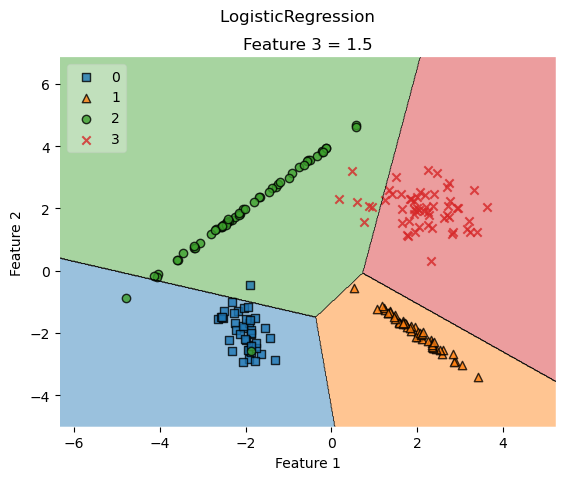

In [ ]:
# Plotting decision regions
fig, ax = plt.subplots()
# Decision region for feature 3 = 1.5
value = 1.5
# Plot training sample with feature 3 = 1.5 +/- 0.75
width = 0.75
plot_decision_regions(X, y, clf=model3,
                      filler_feature_values={2: value},
                      filler_feature_ranges={2: width},
                      legend=2, ax=ax)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Feature 3 = {}'.format(value))

# Adding axes annotations
fig.suptitle('LogisticRegression ')
plt.show()

# Dataset 2

## Data Generation

#### Draw data

In [110]:
!python -m pip install drawdata
from drawdata import draw_scatter
draw_scatter()

  Using cached drawdata-0.3.0-py2.py3-none-any.whl (118 kB)
  Using cached jupyterlab-4.1.6-py3-none-any.whl (11.4 MB)
  Using cached anywidget-0.9.7-py3-none-any.whl (246 kB)
  Using cached psygnal-0.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (730 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.3/383.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [101]:

!pip install --upgrade --no-cache-dir gdown
!gdown 14XVEGuFPEP04bBZ5UPTSPMFrvdEuPLrq

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=14XVEGuFPEP04bBZ5UPTSPMFrvdEuPLrq
To: /content/csv.csv
100% 34.9k/34.9k [00:00<00:00, 68.8MB/s]


### data

In [109]:

df2 = pd.read_csv('/content/csv.csv')
df2

,x,y,z
0,112.679803,85.144616,a
1,109.405658,40.752909,a
2,136.594166,79.996279,a
3,128.514178,87.717378,a
4,132.613337,83.245210,a
...,...,...,...
892,404.579988,416.092834,c
893,354.627369,442.893561,c
894,330.015156,400.620092,c
895,327.575865,472.642300,c


### Preprocessing

In [103]:
from sklearn.utils import shuffle
from sklearn import preprocessing

X_raw = df2.iloc[:,:2].values
y_raw_abc = df2.iloc[:,2].values
# Mapping original values to new values
mapping = {'a': 0, 'b': 1, 'c': 2}

# Convert values using mapping
y_raw= np.vectorize(mapping.get)(y_raw_abc)
X2, y2 = shuffle(X_raw, y_raw, random_state=24)
scaler = preprocessing.StandardScaler()
X2_scaled = scaler.fit_transform(X2)
X2 , X2_scaled



(array([[299.99263049, 417.58265835],
        [345.42433552,  85.74487736],
        [288.39522559, 245.45239811],
        ...,
        [179.83421648,  59.36045824],
        [393.11871805, 128.4647334 ],
        [296.73186941, 125.66792505]]),
 array([[ 0.20295074,  1.39198802],
        [ 0.57488633, -1.23561846],
        [ 0.1080063 ,  0.029001  ],
        ...,
        [-0.78074976, -1.44453943],
        [ 0.96534577, -0.89734784],
        [ 0.17625588, -0.91949394]]))

### train test split

In [111]:
x_train, x_test, y_train, y_test = train_test_split(X2_scaled, y2, test_size=0.2 , random_state=24)

x_train.shape, y_train.shape, x_test.shape, y_test.shape ,

((717, 2), (717,), (180, 2), (180,))

## Logistic regression

### model

In [115]:
model4 = LogisticRegression(solver='saga', max_iter=200, random_state=24)
model4.fit(x_train, y_train)


y_hat = model4.predict(x_test)
print(y_hat)
print(y_test)


[0 0 0 2 1 0 0 1 1 1 0 2 2 1 0 0 1 2 2 0 0 0 2 0 0 0 0 0 1 0 2 0 1 1 0 2 0
 0 0 1 2 2 2 0 0 0 2 0 0 0 1 2 0 0 2 1 1 1 1 0 0 0 0 1 1 1 0 2 0 0 0 0 0 0
 0 0 0 2 2 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 2 1 0 1 2 0 2 1 1 0 0 0 0 1 1 0 1
 0 0 0 1 0 1 1 0 0 0 0 0 2 1 0 0 0 1 1 1 0 0 2 1 0 0 1 2 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 0 0 0 0 0 2 1 0 0 2 0 0 1 0 1 0 1 1 0 0 1 1 2 0 0 0 0]
[0 0 0 2 1 0 0 1 1 1 0 2 2 1 0 0 1 2 2 0 0 0 2 0 0 0 0 0 1 0 2 0 1 1 0 2 0
 0 0 1 2 2 2 0 0 0 2 0 0 0 1 2 0 0 2 1 1 1 1 0 0 0 0 1 1 1 0 2 0 0 0 0 0 0
 0 0 0 2 2 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 2 1 0 1 2 0 2 1 1 0 0 0 0 1 1 0 1
 0 0 0 1 0 1 1 0 0 0 0 0 2 1 0 0 0 1 1 1 0 0 2 1 0 0 1 2 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 0 0 0 0 0 2 1 0 0 2 0 0 1 0 1 0 1 1 0 0 1 1 2 0 0 0 0]


### Result

In [113]:

train_score = model4.score(x_train, y_train)
test_score = model4.score(x_test, y_test)
acc = accuracy_score(y_test,y_hat)
con = confusion_matrix(y_test,y_hat)
print(acc )
print(con)
print ("train score is :" , train_score)
print ("test score is :" , test_score)

1.0
[[103   0   0]
 [  0  49   0]
 [  0   0  28]]
train score is : 0.99581589958159
test score is : 1.0


## Decision boundary Visualization

### without misclassified highlighted

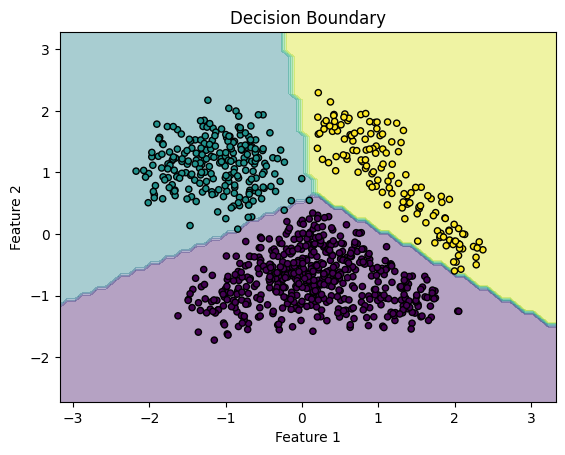

In [116]:
#  Generate a Meshgrid
x_min, x_max = X2_scaled[:, 0].min() - 1, X2_scaled[:, 0].max() + 1
y_min, y_max = X2_scaled[:, 1].min() - 1, X2_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

#  Predict Class Labels
Z = model4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#  Plot the Decision Boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=y2, s=20, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

### with misclassified highlighted

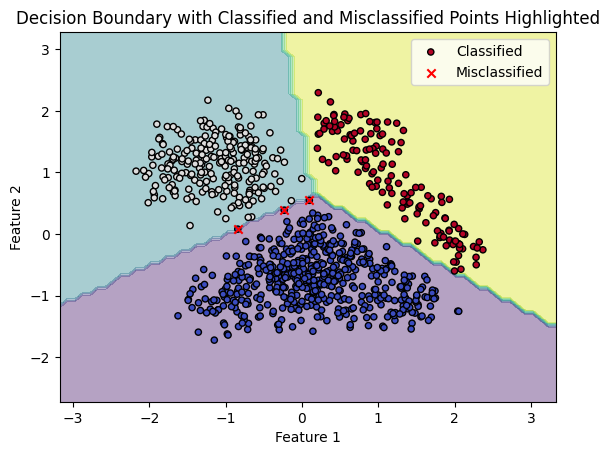

In [117]:
# Step 1: Generate a Meshgrid
x_min, x_max = X2_scaled[:, 0].min() - 1, X2_scaled[:, 0].max() + 1
y_min, y_max = X2_scaled[:, 1].min() - 1, X2_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Step 2: Predict Class Labels
Z = model4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 3: Highlight Misclassified Points
y_pred = model4.predict(X2_scaled)
misclassified = y2 != y_pred

# Step 4: Plot the Decision Boundary and Classified Points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=y_pred, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Classified')
plt.scatter(X2_scaled[misclassified, 0], X2_scaled[misclassified, 1], c='red', marker='x', label='Misclassified')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Classified and Misclassified Points Highlighted')
plt.legend()
plt.show()

## SGDClassifier Perceptron

### model

In [121]:
model5 = SGDClassifier(loss="perceptron"
                          , eta0=0.01
                          , learning_rate="constant"
                          , penalty=None
                          , random_state=24
                          , max_iter=200
                          )
model5.fit(x_train , y_train)

y_hat = model5.predict(x_test)
print(y_hat)
print(y_test)




[0 0 0 2 1 0 0 1 1 1 0 2 2 1 0 0 1 2 2 0 0 0 2 0 0 0 0 0 1 0 2 0 1 1 0 2 0
 0 0 1 2 2 2 0 0 0 0 0 0 0 1 2 0 0 2 1 1 1 1 0 0 0 0 1 1 1 0 2 0 0 0 0 0 0
 0 0 0 2 2 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 2 1 0 1 2 0 2 1 1 0 0 0 0 1 1 0 1
 0 0 0 1 0 1 1 0 0 0 0 0 2 1 0 0 0 1 1 1 0 0 2 1 0 0 1 2 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 0 0 0 0 0 2 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 2 0 0 0 0]
[0 0 0 2 1 0 0 1 1 1 0 2 2 1 0 0 1 2 2 0 0 0 2 0 0 0 0 0 1 0 2 0 1 1 0 2 0
 0 0 1 2 2 2 0 0 0 2 0 0 0 1 2 0 0 2 1 1 1 1 0 0 0 0 1 1 1 0 2 0 0 0 0 0 0
 0 0 0 2 2 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 2 1 0 1 2 0 2 1 1 0 0 0 0 1 1 0 1
 0 0 0 1 0 1 1 0 0 0 0 0 2 1 0 0 0 1 1 1 0 0 2 1 0 0 1 2 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 0 0 0 0 0 2 1 0 0 2 0 0 1 0 1 0 1 1 0 0 1 1 2 0 0 0 0]


### Results

In [122]:

train_score = model5.score(x_train, y_train)
test_score = model5.score(x_test, y_test)
acc = accuracy_score(y_test,y_hat)
con = confusion_matrix(y_test,y_hat)
print(acc)
print(con)
print ("train score is :" , train_score)
print ("test score is :" , test_score)

0.9888888888888889
[[103   0   0]
 [  0  49   0]
 [  2   0  26]]
train score is : 0.9762900976290098
test score is : 0.9888888888888889


##  decision boundary visualization

### without misclassified highlighted

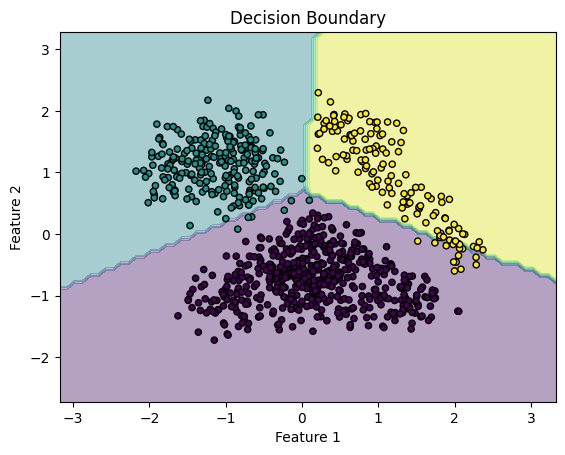

In [123]:
#  Generate a Meshgrid
x_min, x_max = X2_scaled[:, 0].min() - 1, X2_scaled[:, 0].max() + 1
y_min, y_max = X2_scaled[:, 1].min() - 1, X2_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

#  Predict Class Labels
Z = model5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#  Plot the Decision Boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=y2, s=20, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

### with misclassified highlighted

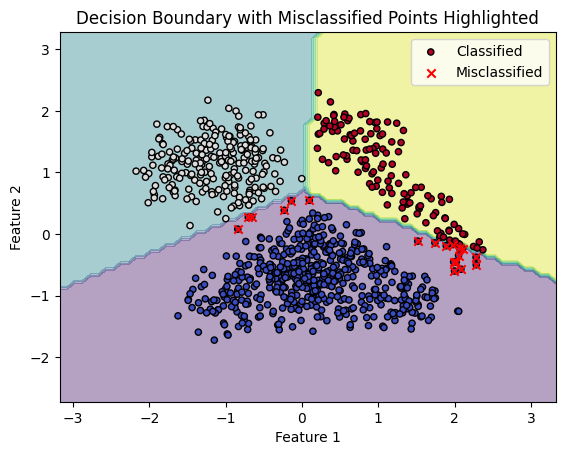

In [124]:
# Generate a Meshgrid
x_min, x_max = X2_scaled[:, 0].min() - 1, X2_scaled[:, 0].max() + 1
y_min, y_max = X2_scaled[:, 1].min() - 1, X2_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict Class Labels
Z = model5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Highlight Misclassified Points
y_pred = model5.predict(X2_scaled)
misclassified = y2 != y_pred

#  Plot the Decision Boundary and Classified Points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=y_pred, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Classified')
plt.scatter(X2_scaled[misclassified, 0], X2_scaled[misclassified, 1], c='red', marker='x', label='Misclassified')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Misclassified Points Highlighted')
plt.legend()
plt.show()